In [1]:
import numpy as np
import matplotlib.pyplot as plt  # Plotting library
import sgd,newton,make_plots

import importlib as imp


import numdifftools as nd
from scipy.optimize import check_grad
import scipy

%matplotlib inline
SGD=False
NEWTON=False

### (i) Create Data

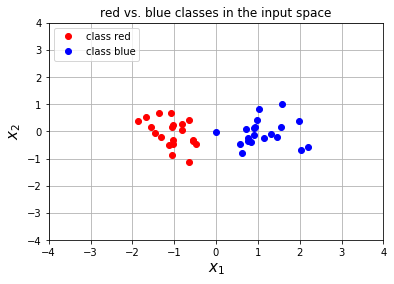

In [2]:
# Define and generate the samples
nb_of_samples_per_class = 20  # The number of sample in each class
red_mean = [-1,0]  # The mean of the red class
blue_mean = [1,0]  # The mean of the blue class
green_mean = [3,3]
std_dev = 1/2  # standard deviation of both classes
# Generate samples from both classes
x_red = np.random.randn(nb_of_samples_per_class, 2) * std_dev + red_mean
x_blue = np.random.randn(nb_of_samples_per_class, 2) * std_dev + blue_mean
x_green = np.random.randn(nb_of_samples_per_class, 2) * std_dev + green_mean

# Merge samples in set of input variables x, and corresponding set of output variables t
X = np.vstack((x_red, x_blue))
y_1=np.zeros(nb_of_samples_per_class)
y_2=np.ones(nb_of_samples_per_class)
y=np.concatenate((y_1,y_2))

# Plot both classes on the x1, x2 plane
#plt.plot(x_green[:,0], x_green[:,1], 'go', label='class green')
plt.plot(x_red[:,0], x_red[:,1], 'ro', label='class red')
plt.plot(x_blue[:,0], x_blue[:,1], 'bo', label='class blue')
plt.grid()
plt.legend(loc=2)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.axis([-4, 4, -4, 4])
plt.title('red vs. blue classes in the input space')
plt.show()



### (ii) Define and plot perceptron loss

In [3]:
### robust sigmoid computation that can work on vectors:
def sigmoid(t):
    # logistic function returns 1 / (1 + exp(-t))
    idx = t > 0
    out = np.empty(t.size, dtype=np.float)
    out[idx] = 1. / (1 + np.exp(-t[idx]))
    exp_t = np.exp(t[~idx])
    out[~idx] = exp_t / (1. + exp_t)
    return out 

### Perceptron risk
def get_loss(w,X,y,lambd=0): 
    n,d = X.shape
    subopt= sigmoid(-y*np.dot(X,w))
    subopt = np.dot(np.ones(n),subopt)/float(n) + 0.5*lambd*np.dot(w.transpose(),w)
    return subopt

def get_gradient(w,X,y,lambd=0): 
    n,d = X.shape
    sig=sigmoid(-y*np.dot(X,w))
    sig_prime=sig*(1-sig)
    return np.dot(X.transpose(),-y*sig_prime)/float(n)+lambd*w

def get_hessian(w,X,y,lambd=0):
    n,d = X.shape
    h = np.zeros((d,d))
    sig=sigmoid(-y*np.dot(X,w))
    sig_prime=sig*(1-sig)
    sig_prime_prime=-2*sig*sig_prime+sig_prime
    H=np.dot(X.transpose(),X*(y**2*sig_prime_prime)[:, np.newaxis])/float(n)+ np.eye(d)*lambd
    return H


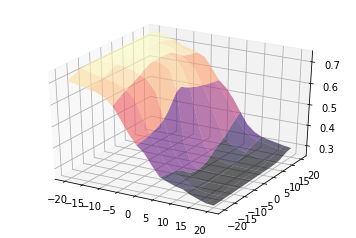

In [4]:
# initialize loss matrix
nb_of_ws = 20 
ws1 = np.linspace(-20, 20, num=nb_of_ws) # weight 1
ws2 = np.linspace(-20, 20, num=nb_of_ws) # weight 2
ws_x, ws_y = np.meshgrid(ws1, ws2) # generate grid
cost_ws = np.zeros((nb_of_ws, nb_of_ws)) # 

# Fill the loss matrix for each combination of weights
for i in range(nb_of_ws):
    for j in range(nb_of_ws):
        cost_ws[i,j] = get_loss(np.array((ws_x[i,j], ws_y[i,j])), X , y)

# Plot the cost function surface

if False:
    plt.figure(1)

    plt.contourf(ws_x, ws_y, cost_ws, 20)
    cbar = plt.colorbar()
    cbar.ax.set_ylabel('$\\xi$', fontsize=15)
    plt.xlabel('$w_1$', fontsize=15)
    plt.ylabel('$w_2$', fontsize=15)
    plt.title('Cost function surface')
    plt.grid()
    plt.show()

#3d plot of logistic loss surface
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')         # set the 3d axes
ax.plot_surface(ws_x, ws_y, cost_ws, 
               rstride=3, 
              cstride=3,
             alpha=0.6,  cmap=cm.magma)         # colour map


if  SGD:
    ax.scatter(SGD_steps[:,0], SGD_steps[:,1],SGD_loss,s=45,marker='x',c='g', zorder=280, linewidth='2',alpha=0.9, label='SGD')
    
if  NEWTON:
    ax.scatter(NEWTON_steps[:,0], NEWTON_steps[:,1],NEWTON_loss,s=45,marker='x',c='k', zorder=280, linewidth='2',alpha=0.9, label='SGD')

### (iii) Run Methods

--- SGD ---
- Batch size: 4
- Learning rate: 1
--- NEWTON ---
- Batch size: 40
- Learning rate: 0.1


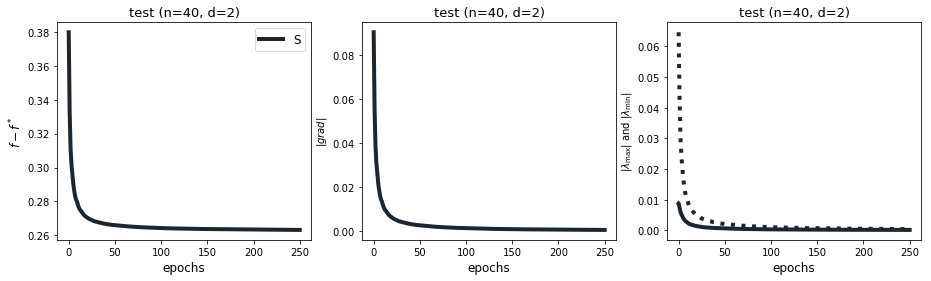

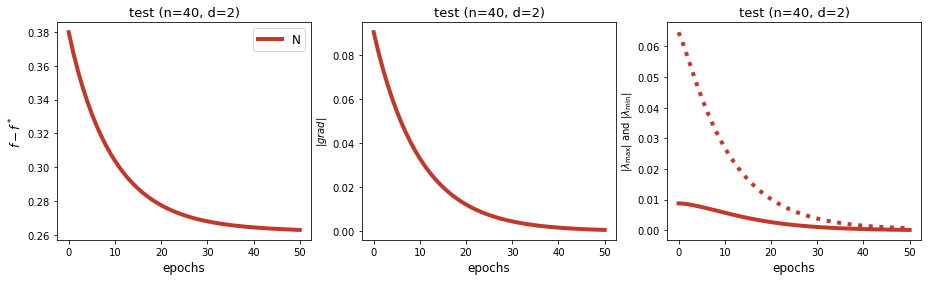

In [5]:
def show_plots(x_limits_time=None):
    list_params=[]
    list_loss=[]
    list_x=[]
    list_samples=[]
    list_grads=[]
    list_EVs=[]
    #plot options (non exclusive)
    log_scale=False  
    over_time=False
    over_iterations=False #(needs adaption for SGD)
    over_epochs=True
        
    if SGD:
        list_loss.append(SGD_loss)
        list_x.append(SGD_x)
        list_samples.append(SGD_samples)
        list_grads.append(SGD_grads)
        list_EVs.append(SGD_EVs)

        list_params.append('SGD')
    if NEWTON:
        list_loss.append(NEWTON_loss)
        list_x.append(NEWTON_x)
        list_samples.append(NEWTON_samples)
        list_grads.append(NEWTON_grads)
        list_EVs.append(NEWTON_EVs)
        list_params.append('NEWTON')      
        
    if over_time:
        make_plots.two_d_plot_time(list_loss,list_x,list_params,list_grads,'test', 40, 2, log_scale,x_limits=x_limits_time)
        
    if over_iterations:
        make_plots.two_d_plot_iterations(list_loss,list_x,list_params,list_grads,'test', 40, 2, log_scale)
        
    if over_epochs:
        make_plots.two_d_plot_epochs(list_loss,list_samples,list_params,list_grads,list_EVs,'test', 40, 2, log_scale)


opt = {}
opt['subproblem_solver_SCR']='lanczos' # alternatives: lanczos, cauchy_point, exact
opt['subproblem_solver_TR']='GLTR' # alternatives: GLTR, cauchy_point, exact, dog_leg, cg
opt['print_progress']=False

opt['n_epochs_sgd']=250
opt['n_epochs_newton']=50

opt['learning_rate_sgd']=1
opt['learning_rate_newton']=0.1



opt['batch_size_sgd']=X.shape[0]/10

loss_args={}


SCR=False
TR= False
SGD= True
NEWTON= True

w=np.array((1,0))

if SGD:  
    (w_SGD,SGD_x, SGD_loss, SGD_samples,SGD_steps,SGD_grads,SGD_EVs)=sgd.SGD(w,get_loss,get_gradient,get_hessian, X=X, Y=y, opt=opt, **loss_args)

if NEWTON:  
    (w_NEWTON,NEWTON_x, NEWTON_loss, NEWTON_samples,NEWTON_steps,NEWTON_grads, NEWTON_EVs)=newton.NEWTON(w,get_loss,get_gradient,get_hessian ,X=X, Y=y, opt=opt, **loss_args)
        
    
show_plots()    
